<a href="https://colab.research.google.com/github/prajuktadey/Fuel-Efficiency-GFG/blob/main/Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Consumption Prediction Using Linear Regression
By: Prajukta Dey

# **Importing Libraries**

In [74]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

# **Uploading and reading the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving competition_edu_dataset.csv to competition_edu_dataset.csv


In [ ]:
# Reading the dataset
df=pd.read_csv('competition_edu_dataset.csv',encoding='unicode_escape',on_bad_lines='skip')

**Data Understanding**

In [ ]:
# let's see the meaning of the columns of the data
# mpg - Milieage/Miles Per Galon
# cylinders - the power unit of the car where gasoline is turned into power
# displacement - engine displacement of the car
# horsepower - rate of the engine performance
# weight - the weight of a car
# acceleration - the acceleration of a car
# model - model of the car
# origin - the origin of the car 
# car - the name of the car

df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
5,13.0,8,302.0,130,3870,15.0,76,1,ford f108
6,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
7,25.5,4,140.0,89,2755,15.8,77,1,ford mustang ii 2+2
8,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
9,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare


In [ ]:
# displaying the number of rows and columns
z=df.shape
print("Number of columns: ", z[0])
print("Number of rows: ", z[1])

Number of columns:  300
Number of rows:  9


There are 300 data entries in the dataset provided.

In [ ]:
# displaying column names
y=df.columns
print("Columns of the dataset:\n")
for i in y:
  print(i)

Columns of the dataset:

MPG
Cylinders
Displacement
Horsepower
Weight
Acceleration
Model Year
Origin
Car Name


In the above cell, the column names are being displayed.

In [ ]:
# glossary
x=["MPG = (Miles per Gallon)" ]
for i in x:
  print(i)

MPG = (Miles per Gallon)


The above cell states that the MPG abbreviation stands for Miles per Gallon.

In [ ]:
# displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    object 
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ KB


 We can see that the horsepower column is an object datatype. We will try to clean the horsepower column during the cleaning time.

In [ ]:
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,23.679333,5.430000,192.118333,2952.820000,15.567000,76.043333,1.563333
std,7.803218,1.703361,104.711230,836.196298,2.811469,3.782744,0.792517
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,98.000000,2219.750000,13.875000,73.000000,1.000000
50%,23.000000,4.000000,144.500000,2789.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,263.250000,3565.750000,17.125000,79.000000,2.000000
max,44.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# checking for duplicate values
if sum(df.duplicated())==0:
  print("There are no duplicate values.")
else:
  print("Duplicate values exist.")
  print("Number of duplicate values: ", sum(df.duplicated()))

There are no duplicate values.


In [ ]:
# locating the missing values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

There are no null values in the dataset.

In [ ]:
# These are all the unique values present in the dataframe
df.nunique()

MPG             109
Cylinders         5
Displacement     75
Horsepower       79
Weight          273
Acceleration     88
Model Year       13
Origin            3
Car Name        244
dtype: int64

# **Data Cleaning and Processing**

In [83]:
#original dataset
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
5,13.0,8,302.0,130,3870,15.0,76,1,ford f108
6,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
7,25.5,4,140.0,89,2755,15.8,77,1,ford mustang ii 2+2
8,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
9,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare


In [84]:
#copying the dataset
data = df.copy()

In [85]:
#displaying the copied dataset
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
5,13.0,8,302.0,130,3870,15.0,76,1,ford f108
6,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
7,25.5,4,140.0,89,2755,15.8,77,1,ford mustang ii 2+2
8,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
9,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare


In [86]:
# we have seen that the horsepower column is an object datatype
#let's figure out why we are getting an object datatype
data.Horsepower.unique()

array(['190', '145', '170', '110', '150', '130', '87', '89', '67', '100',
       '167', '175', '83', '80', '135', '84', '198', '68', '86', '70',
       '120', '95', '75', '105', '97', '71', '78', '88', '165', '180',
       '63', '54', '125', '92', '?', '69', '65', '90', '81', '60', '77',
       '129', '140', '96', '115', '85', '138', '155', '137', '62', '46',
       '49', '225', '113', '52', '48', '61', '82', '193', '72', '76',
       '153', '93', '112', '160', '108', '152', '79', '58', '98', '64',
       '107', '230', '158', '215', '220', '148', '74', '139'],
      dtype=object)

We can see that the odd value is actually a '?'. So we now change it to NaN value and fill the spot with the mean horsepower.

In [87]:
#cleaning of the horsepower column
data.Horsepower = data.Horsepower.str.replace('?','NaN').astype(float)
data.Horsepower.fillna(data.Horsepower.mean(),inplace=True)
data.Horsepower = data.Horsepower.astype(int)

In [88]:
# printing the info of the dataset again to see the datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    int64  
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 21.2+ KB


In [89]:
# we won't be needing the car column so we drop it
#notice, we are doing everything on data and not df because we don't want to alter the original dataset
data = data.drop('Car Name',axis=1)

In [90]:
#after dropping the car name, checking for duplicate and null values and displaying the dataset again
print('sum of duplicated values: {}\n'.format(data.duplicated().sum()))
print('sum of null values: {}'.format(data.isnull().sum()))

data.head(10)

sum of duplicated values: 0

sum of null values: MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,13.0,8,400.0,190,4422,12.5,72,1
1,13.0,8,350.0,145,3988,13.0,73,1
2,15.5,8,350.0,170,4165,11.4,77,1
3,17.0,6,231.0,110,3907,21.0,75,1
4,13.0,8,318.0,150,3755,14.0,76,1
5,13.0,8,302.0,130,3870,15.0,76,1
6,25.0,4,110.0,87,2672,17.5,70,2
7,25.5,4,140.0,89,2755,15.8,77,1
8,38.0,4,91.0,67,1995,16.2,82,3
9,20.5,6,225.0,100,3430,17.2,78,1


# **One Hot Encoding**

In [ ]:
Origin = data.pop('Origin')

The "Origin" column is really categorical, not numeric. So we convert that to a one-hot.

In [ ]:
data['China'] = (Origin == 1)*1.0
data['Japan'] = (Origin == 2)*1.0
data['Germany'] = (Origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,China,Japan,Germany
295,22.0,6,232.0,112,2835,14.7,82,1.0,0.0,0.0
296,18.0,6,250.0,78,3574,21.0,76,1.0,0.0,0.0
297,18.1,8,302.0,139,3205,11.2,78,1.0,0.0,0.0
298,15.0,8,318.0,150,4135,13.5,72,1.0,0.0,0.0
299,40.9,4,85.0,104,1835,17.3,80,0.0,1.0,0.0


The top 3 countries for car production according to recent research say:

1. China
2. Japan
3. Germany

# **Plotting Categorical Data**

In [66]:
categorical_columns = ['Cylinders', 'Model Year']

for col in categorical_columns:
    print(
        f'Value counts of "{data[col].name}" column:\n{data[col].value_counts()}')
    print()

Value counts of "Cylinders" column:
4    157
8     77
6     61
3      3
5      2
Name: Cylinders, dtype: int64

Value counts of "Model Year" column:
73    29
76    28
82    27
70    24
78    23
79    23
80    23
71    22
81    21
72    20
77    20
75    20
74    20
Name: Model Year, dtype: int64



We will turn the dtype of cylinders, model year into categorical dtype.

In [67]:
# convert dtype to 'category'
data['Cylinders'] = data['Cylinders'].astype('category')
data['Model Year'] = data['Model Year'].astype('category')

Now I want to create a boxplot to see how each categorical column affects a vehicle's performance.

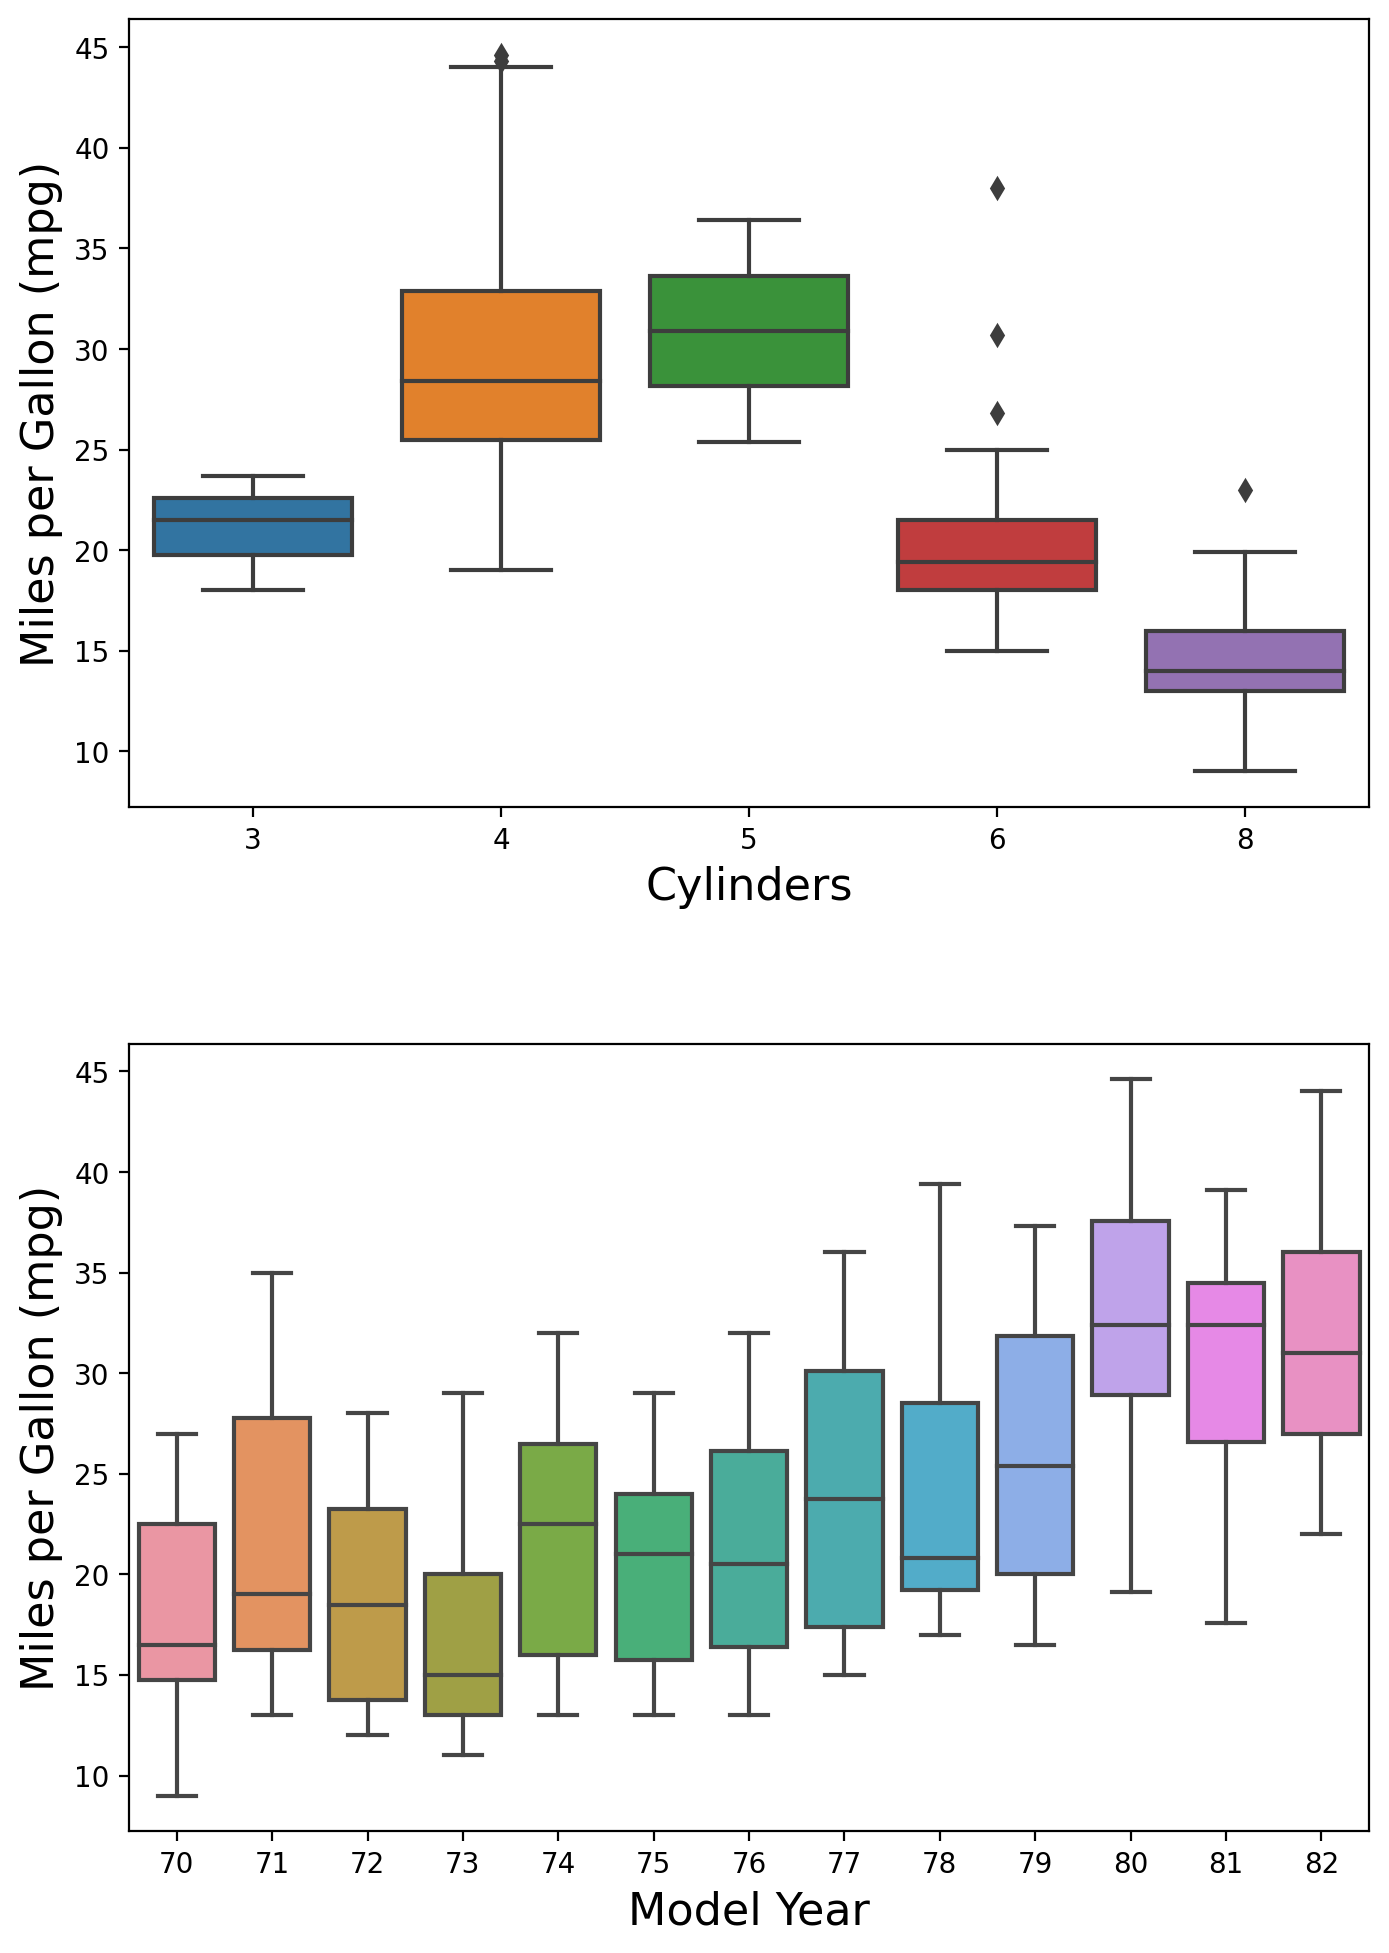

In [72]:
fig, axes = plt.subplots(figsize=(8, 12), dpi=200,
                         nrows=2, ncols=1, gridspec_kw={'hspace': 0.3})

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='MPG', data=data, ax=axes[i])
    axes[i].set_ylabel('Miles per Gallon (mpg)', fontsize=16)
    axes[i].set_xlabel(col.title(), fontsize=16)
    
plt.show()

From the above plot, it looks like cars with 4 cylinders generally achive higher mileage. 

For the model year column, the later the year when the car was produced, the better the performance.

# **Data Visualization**

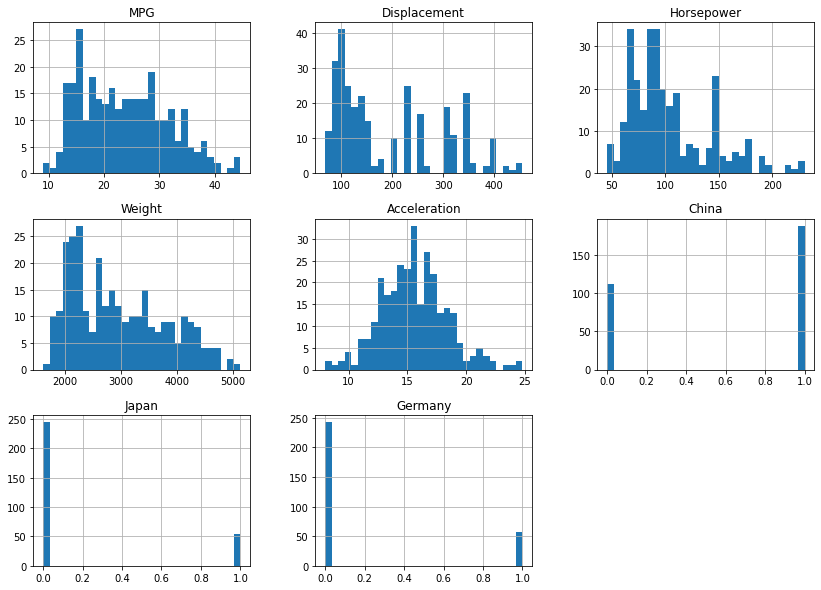

In [73]:
# let's visualize the distribution of the features of the cars
data.hist(figsize=(14,10),bins=30)
plt.show()

Text(0.5, 1.0, 'Heatmap displaying the relationship between\nthe features of the data')

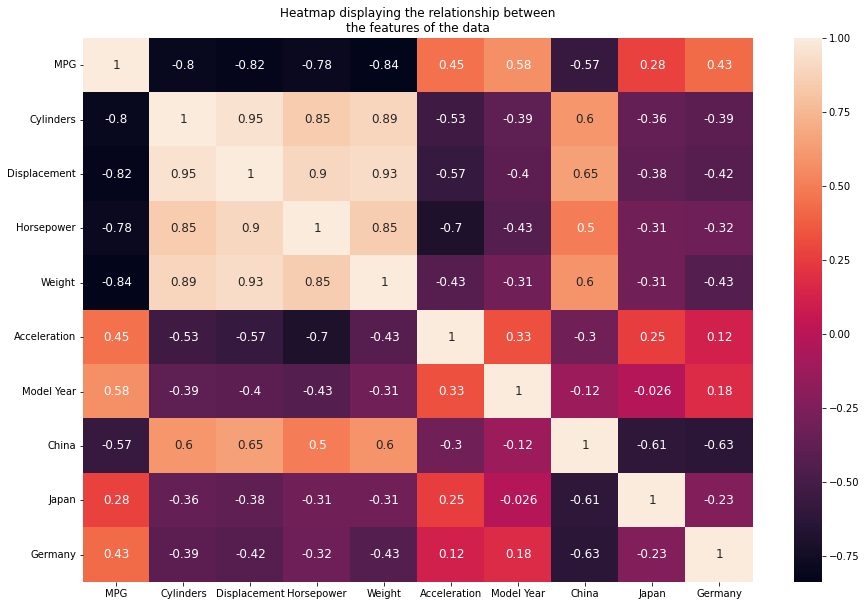

In [42]:
#trying to find the correlation between the features
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, annot_kws={"size":12})
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=12)

1. Car weight and displacement have the strongest inverse correlation with mileage. Lines up well with intuition that the more weighted cars isn’t the most efficient user of gasoline.

2. Horsepower and number of cylinders are also strongly inversely correlated with mileage meaning a fast car needs more number of cylinders.

In [44]:
# print the correlation between the mpg and the remaining variables
print('Correlation between mpg and the remaining variables:\n\n{}'.format(data.corr().MPG))

Correlation between mpg and the remaining variables:

MPG             1.000000
Cylinders      -0.798505
Displacement   -0.818860
Horsepower     -0.782598
Weight         -0.837118
Acceleration    0.453749
Model Year      0.575630
China          -0.570778
Japan           0.279704
Germany         0.427863
Name: MPG, dtype: float64


Variables which have a direct relationship (a positive correlation) increase together and decrease together. In an inverse relationship (a negative correlation), one variable increases while the other decreases.

The one thing to keep in mind is, this correlation is in respect witb MPG which is the target value for this model.

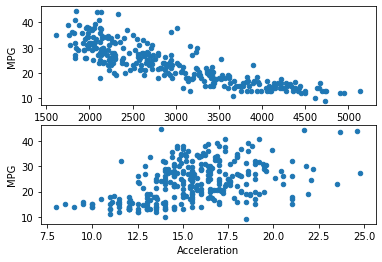

In [45]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
data.plot('Weight','MPG',kind='scatter',ax=ax1)
data.plot('Acceleration','MPG',kind='scatter',ax=ax2)
plt.show()

The above scatterplot shows a strong negative linear relationship between weight and mpg and a weak positive relationship between acceleration and mpg.

We can conclude that MPG decreases with an increase in weight and increases somewhat with the increase in acceleration.

MPG is also the primary measurement of a car's fuel efficiency hence more the weight, less the fuel efficiency.

# **Model Training**

Before training our model, we need to one hot encode the categorical columns.

In [93]:
# one-hot encode the categorical columns
X= data
y = data['MPG']

In [94]:
# one-hot encode the categorical columns
one_hot = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer([('one_hot', one_hot, categorical_columns)],
                       remainder='passthrough')
X = ct.fit_transform(X)

In [106]:
# print the correlation between the mpg and the remaining variables
print('Correlation between mpg and the remaining variables:\n\n{}'.format(newcars.corr().MPG))

Correlation between mpg and the remaining variables:

MPG             1.000000
Horsepower     -0.782598
Acceleration    0.453749
Model Year      0.575630
China          -0.570778
Japan           0.279704
Germany         0.427863
Name: MPG, dtype: float64


In [188]:
X = newcars.drop('MPG',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.MPG   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.5,random_state=70)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [189]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7293494480208988

Test score: 0.7737378300798966

Overall model accuracy: 0.7737378300798966

Mean Squared Error: 14.20466953995768


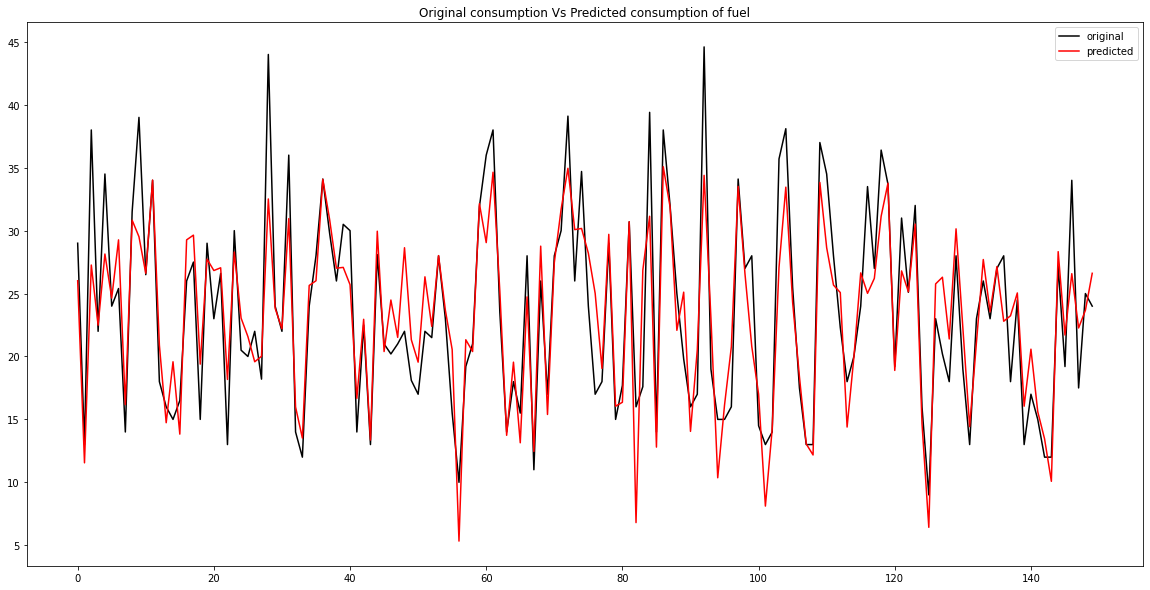

In [197]:
plt.figure(figsize=(20,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original", color="black")
plt.plot(x_ax, linear_pred, label="predicted", color="red")
plt.title("Original consumption Vs Predicted consumption of fuel")
plt.legend()
plt.show()